In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
EarliestDate = session.query(Measurement.date).order_by(Measurement.date).first()
EarliestDate

('2010-01-01',)

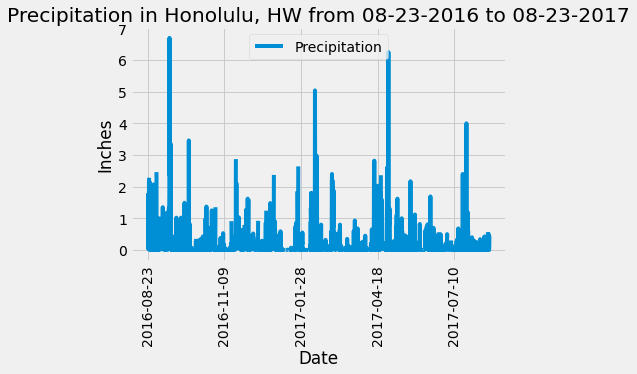

<Figure size 720x720 with 0 Axes>

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
LatestDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
LatestDate
# Calculate the date one year from the last date in data set.
dtlatest = dt.datetime.strptime(LatestDate[0], '%Y-%m-%d')
querydate = dt.date(dtlatest.year -1, dtlatest.month, dtlatest.day)
querydate
# Perform a query to retrieve the data and precipitation scores
searchdata = [Measurement.date, Measurement.prcp]
query = session.query(*searchdata).filter(Measurement.date >= querydate).all()
query
# Save the query results as a Pandas DataFrame and set the index to the date column
precipDF = pd.DataFrame(query, columns= ["Date", "Precipitation"])

# Sort the dataframe by date
precipDF = precipDF.sort_values(["Date"], ascending=True)
precipDF =precipDF.set_index(["Date"])
precipDF

# Use Pandas Plotting with Matplotlib to plot the data
precipDF.plot(rot=90)
plt.ylabel("Inches")
plt.title("Precipitation in Honolulu, HW from 08-23-2016 to 08-23-2017")
plt.figure(figsize=(10,10))
plt.savefig("Images/PrecipitationBar.png")
plt.show()



In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipDF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
MinStat = session.query(func.min(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()
MaxStat = session.query(func.max(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()
AvgStat = session.query(func.avg(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()
print(MinStat, MaxStat, AvgStat)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


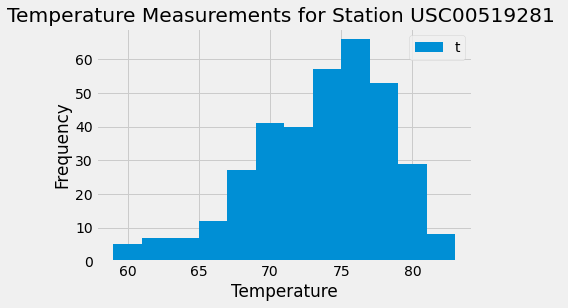

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
dtlatest = dt.datetime.strptime(LatestDate[0], '%Y-%m-%d')
querydate = dt.date(dtlatest.year -1, dtlatest.month, dtlatest.day)
querydate
searchdata2 = [Measurement.date, Measurement.tobs]
querytobs = session.query(*searchdata2).filter(Measurement.date >= querydate).\
filter(Measurement.station =="USC00519281").all()
#querytobs

#Jam this sucker into a dataframe
tobsDF = pd.DataFrame(querytobs, columns=["Date", "Temperature"])
tobsDF

#PLOT HISTOGRAM
plt.hist(tobsDF["Temperature"], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend("tobs")
plt.title("Temperature Measurements for Station USC00519281 ")
plt.savefig("Images/TOBS_Histogram.png")
plt.show()

# Close session

In [81]:
# Close Session
session.close()